In [115]:
import pickle
import pandas as pd
import numpy as np
from collections import Counter,defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
from time import time

In [2]:
song_2_cat = pickle.load(open("../dataClustering/song_art_2_lda_cat_prop","rb"))
song_2_cat

,song,artist,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10
0,sauce it up,lil uzi vert,0.000000,0.102696,0.038709,0.079205,0.019801,0.000000,0.000000,0.609886,0.000000,0.143395,0.000000
1,backroad song,granger smith,0.639467,0.178155,0.000000,0.000000,0.027369,0.000000,0.074016,0.000000,0.000000,0.000000,0.077883
2,feelin' satisfied,boston,0.473315,0.073715,0.110953,0.000000,0.000000,0.131726,0.205465,0.000000,0.000000,0.000000,0.000000
3,saturday morning confusion,bobby russell,0.083360,0.424313,0.000000,0.000000,0.018672,0.000000,0.025331,0.109812,0.000000,0.000000,0.331200
4,country man,luke bryan,0.025522,0.414117,0.049054,0.000000,0.059638,0.000000,0.087279,0.138261,0.000000,0.117062,0.106683
5,try,p!nk,0.000000,0.000000,0.000000,0.525343,0.000000,0.234049,0.235556,0.000000,0.000000,0.000000,0.000000
6,big in japan,alphaville,0.000000,0.290520,0.000000,0.027089,0.000000,0.140932,0.000000,0.204657,0.000000,0.025096,0.306833
7,cheeseburger in paradise,jimmy buffett,0.000000,0.306976,0.000000,0.058170,0.000000,0.000000,0.000000,0.235157,0.068563,0.000000,0.326648
8,landslide,olivia newton-john,0.019634,0.056153,0.203243,0.235980,0.000000,0.022806,0.053862,0.000000,0.000000,0.000000,0.405867
9,some enchanted evening,jane olivor,0.000000,0.000000,0.176972,0.425725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.387055


In [37]:
dom_cats = []
for i,r in song_2_cat.iterrows():
    prop_2_cat = sorted([(p,i) for i,p in enumerate(r[2:]) if p > 0.0],reverse=True)
    dom_cats.append([c for p,c in prop_2_cat[:3]])
song_2_cat["3Dom_Cat"] = dom_cats
song_2_cat.head()

,song,artist,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10,3Dom_Cat
0,sauce it up,lil uzi vert,0.000000,0.102696,0.038709,0.079205,0.019801,0.000000,0.000000,0.609886,0.0,0.143395,0.000000,"[7, 9, 1]"
1,backroad song,granger smith,0.639467,0.178155,0.000000,0.000000,0.027369,0.000000,0.074016,0.000000,0.0,0.000000,0.077883,"[0, 1, 10]"
2,feelin' satisfied,boston,0.473315,0.073715,0.110953,0.000000,0.000000,0.131726,0.205465,0.000000,0.0,0.000000,0.000000,"[0, 6, 5]"
3,saturday morning confusion,bobby russell,0.083360,0.424313,0.000000,0.000000,0.018672,0.000000,0.025331,0.109812,0.0,0.000000,0.331200,"[1, 10, 7]"
4,country man,luke bryan,0.025522,0.414117,0.049054,0.000000,0.059638,0.000000,0.087279,0.138261,0.0,0.117062,0.106683,"[1, 7, 9]"


In [58]:
BB = pd.read_csv("../data/Hot Stuff.csv")
low = lambda s: s.lower()
BB["song"] = [s.lower() for s in BB["Song"]]
BB["artist"] = [s.lower() for s in BB["Performer"]]
BB["timestep"] = pd.to_datetime(BB["WeekID"])
BB = BB.sort_values("timestep")
BB.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,song,artist,timestep
5037,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,48,Return To Me,Dean Martin,Return To MeDean Martin,1,NaN,48,1,return to me,dean martin,1958-08-02
10546,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,70,Don't Go Home,The Playmates,Don't Go HomeThe Playmates,1,NaN,70,1,don't go home,the playmates,1958-08-02
3986,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,8,My True Love,Jack Scott,My True LoveJack Scott,1,NaN,8,1,my true love,jack scott,1958-08-02
13350,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,41,Early In The Morning,Buddy Holly,Early In The MorningBuddy Holly,1,NaN,41,1,early in the morning,buddy holly,1958-08-02
68116,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,90,Stay,The Ames Brothers,StayThe Ames Brothers,1,NaN,90,1,stay,the ames brothers,1958-08-02


In [60]:
total_cat_participation = [np.sum(r[2:-1]) for i,r in song_2_cat.iterrows()]

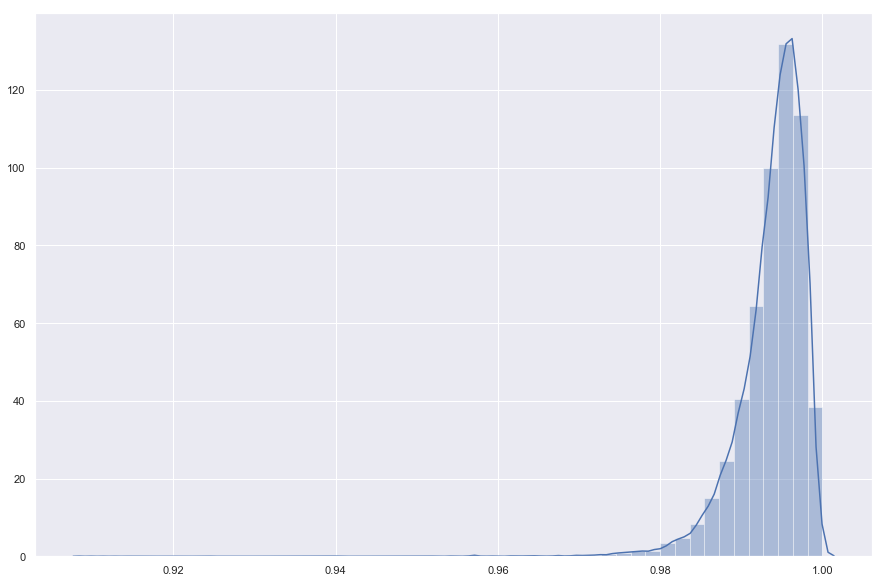

In [61]:
sns.distplot(total_cat_participation) # see total category participation of each song

In [62]:
sorted(total_cat_participation)[:10]

[0.9090790748596191,
 0.9242226481437683,
 0.9338707774877548,
 0.9350286722183228,
 0.9370019733905792,
 0.9380447417497635,
 0.9393652230501175,
 0.9401944279670715,
 0.9465197920799255,
 0.9510214924812317]

Songs appear to be in categories, there are no songs that are left out

In [64]:
max_cat_participation = [max(r[2:-1]) for i,r in song_2_cat.iterrows()]

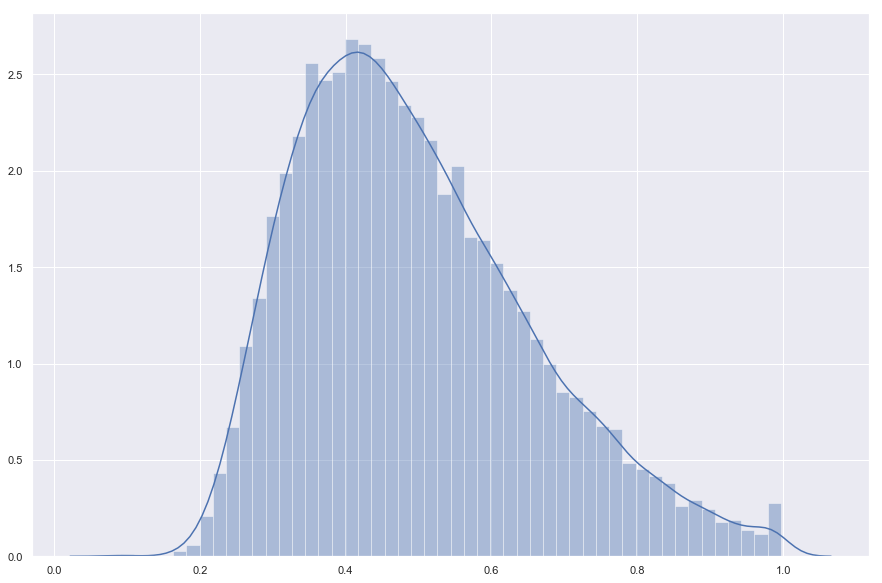

In [65]:
sns.distplot(max_cat_participation) # most songs have a category preference(s) 

In [66]:
Big_DF = BB.merge(song_2_cat,left_on=["song","artist"],right_on=["song","artist"],how="inner")
print(len(Big_DF))
print(len(BB))
Big_DF.head()

275902
315295


,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,...,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10,3Dom_Cat
0,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,48,Return To Me,Dean Martin,Return To MeDean Martin,1,NaN,48,1,...,0.513289,0.000000,0.000000,0.0,0.0,0.0,0.235095,0.0,0.0,"[2, 1, 8]"
1,http://www.billboard.com/charts/hot-100/1958-0...,8/9/1958,63,Return To Me,Dean Martin,Return To MeDean Martin,1,48.0,48,2,...,0.513289,0.000000,0.000000,0.0,0.0,0.0,0.235095,0.0,0.0,"[2, 1, 8]"
2,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,92,Return To Me,Dean Martin,Return To MeDean Martin,1,63.0,48,3,...,0.513289,0.000000,0.000000,0.0,0.0,0.0,0.235095,0.0,0.0,"[2, 1, 8]"
3,http://www.billboard.com/charts/hot-100/1958-0...,8/23/1958,96,Return To Me,Dean Martin,Return To MeDean Martin,1,92.0,48,4,...,0.513289,0.000000,0.000000,0.0,0.0,0.0,0.235095,0.0,0.0,"[2, 1, 8]"
4,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,70,Don't Go Home,The Playmates,Don't Go HomeThe Playmates,1,NaN,70,1,...,0.429937,0.103237,0.129957,0.0,0.0,0.0,0.000000,0.0,0.0,"[2, 0, 1]"


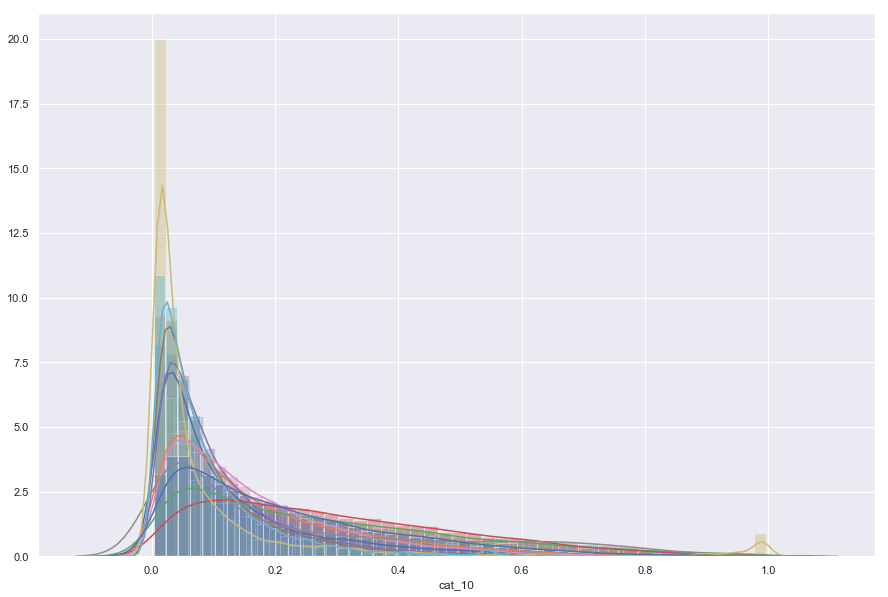

In [67]:
for col in song_2_cat.columns[2:-1]:
    sns.distplot(song_2_cat[song_2_cat[col]>0.0][col])
plt.show()

In [68]:
len(Big_DF.timestep.unique())

3153

In [69]:
week_data = []
week_data_colnames = ["timestep"]+["cat{}_cnts".format(i) for i in range(11)]+["cat{}_sums".format(i) for i in range(11)]+["cat{}_avg".format(i) for i in range(11)]
for week in Big_DF.timestep.unique():
    subset_df = Big_DF[Big_DF["timestep"] == week]
    cat_cnts = [0]*11
    cat_sums = [0.0]*11
    for i,r in subset_df.iterrows():
        for cat in r["3Dom_Cat"]:
            cat_cnts[cat]+=1
            cat_sums[cat]+=r["cat_{}".format(cat)]
    cat_avg = [(s/c) if c > 0 else 0 for s,c in zip(cat_sums,cat_cnts)]
    week_data.append([week]+cat_cnts+cat_sums+cat_avg)

In [70]:
week_data_df = pd.DataFrame(week_data,columns=week_data_colnames)
print(week_data_df.shape)
week_data_df.head()

(3153, 34)


,timestep,cat0_cnts,cat1_cnts,cat2_cnts,cat3_cnts,cat4_cnts,cat5_cnts,cat6_cnts,cat7_cnts,cat8_cnts,...,cat1_avg,cat2_avg,cat3_avg,cat4_avg,cat5_avg,cat6_avg,cat7_avg,cat8_avg,cat9_avg,cat10_avg
0,1958-08-02,17,25,49,23,15,11,19,3,3,...,0.269514,0.455901,0.326027,0.229547,0.206242,0.231762,0.228968,0.191738,0.242538,0.285916
1,1958-08-09,18,25,53,28,14,13,18,4,3,...,0.272524,0.451417,0.321185,0.209374,0.183920,0.229945,0.320396,0.191738,0.240827,0.286398
2,1958-08-16,14,22,46,24,15,11,15,4,3,...,0.283769,0.455144,0.291122,0.205967,0.206762,0.246427,0.233494,0.191738,0.250288,0.294703
3,1958-08-23,17,22,46,23,14,12,14,5,3,...,0.280207,0.445662,0.314947,0.202642,0.200878,0.247508,0.305731,0.191738,0.250288,0.292283
4,1958-08-30,16,18,41,23,13,11,13,5,2,...,0.313165,0.456953,0.315376,0.192908,0.201776,0.252156,0.234258,0.170060,0.242846,0.283094


In [81]:
week_data_df = week_data_df.sort_values("timestep")

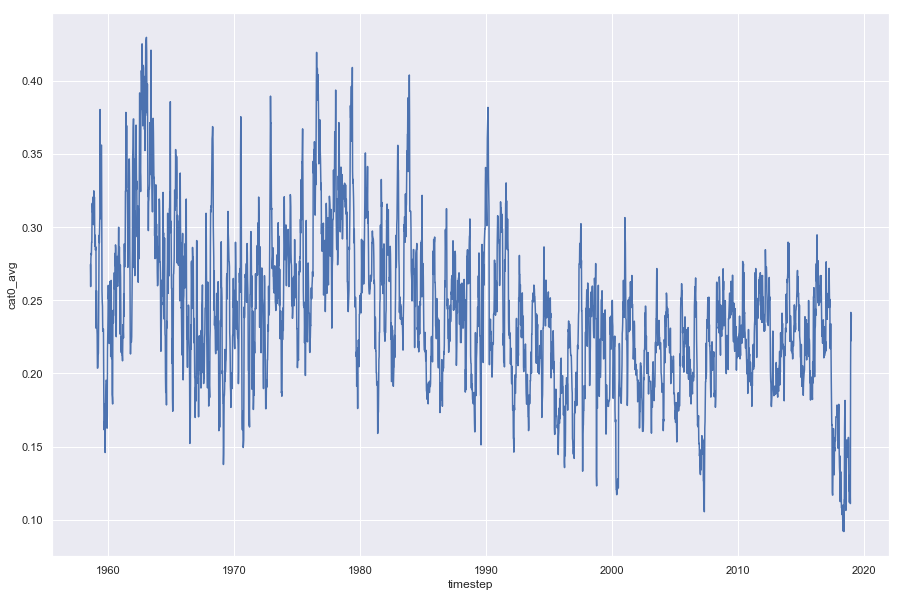

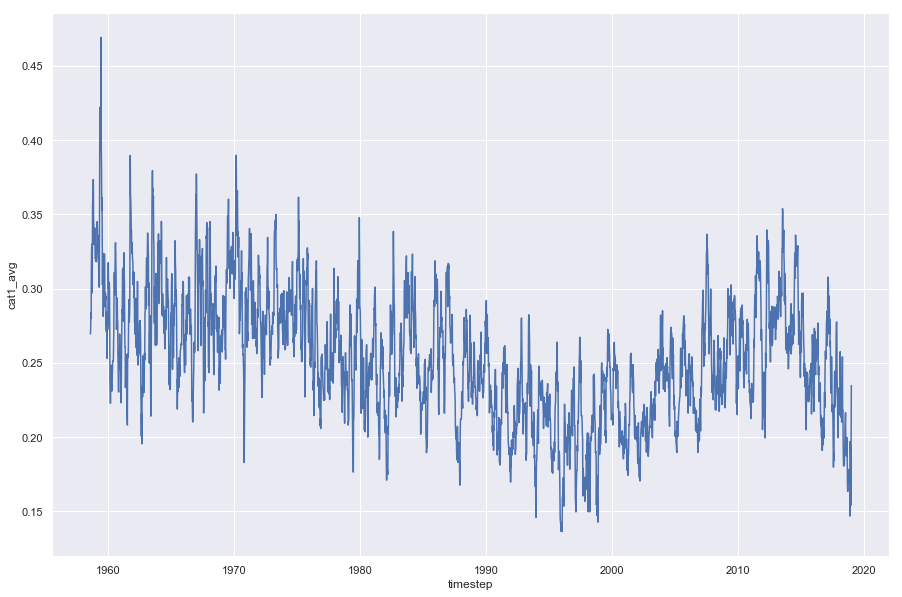

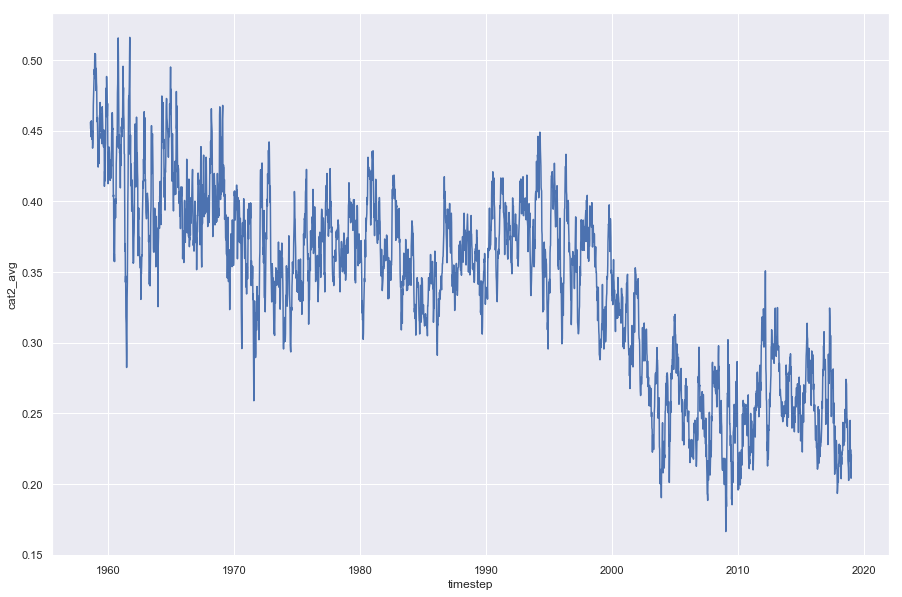

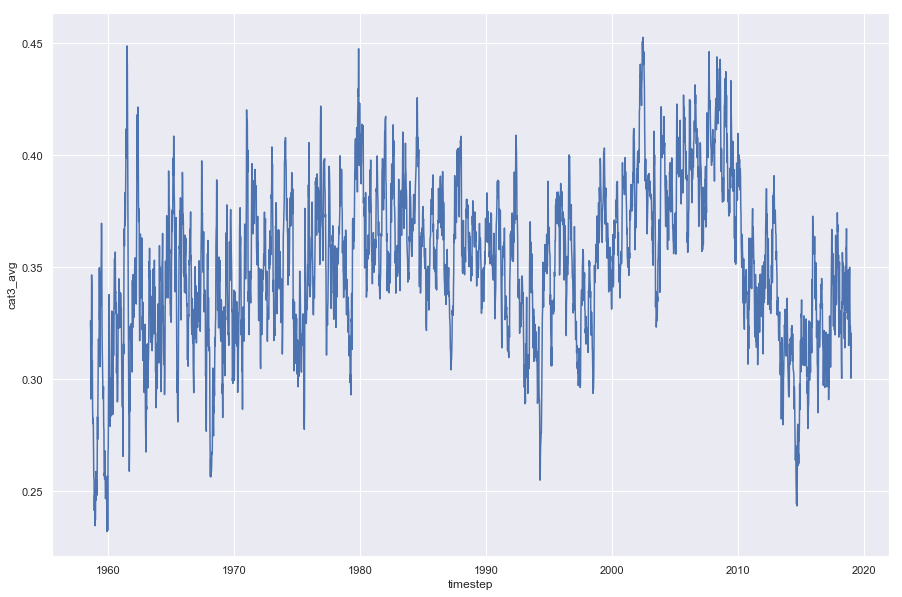

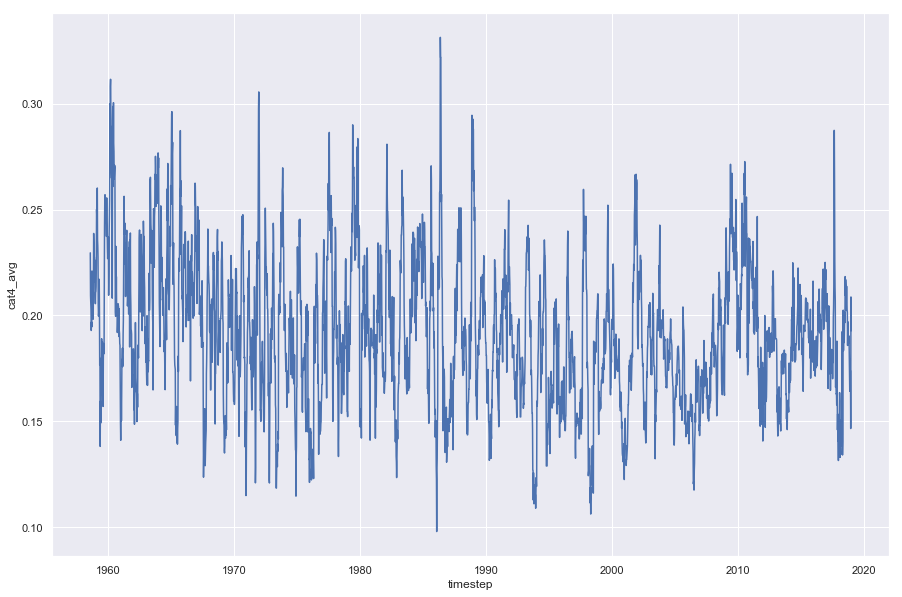

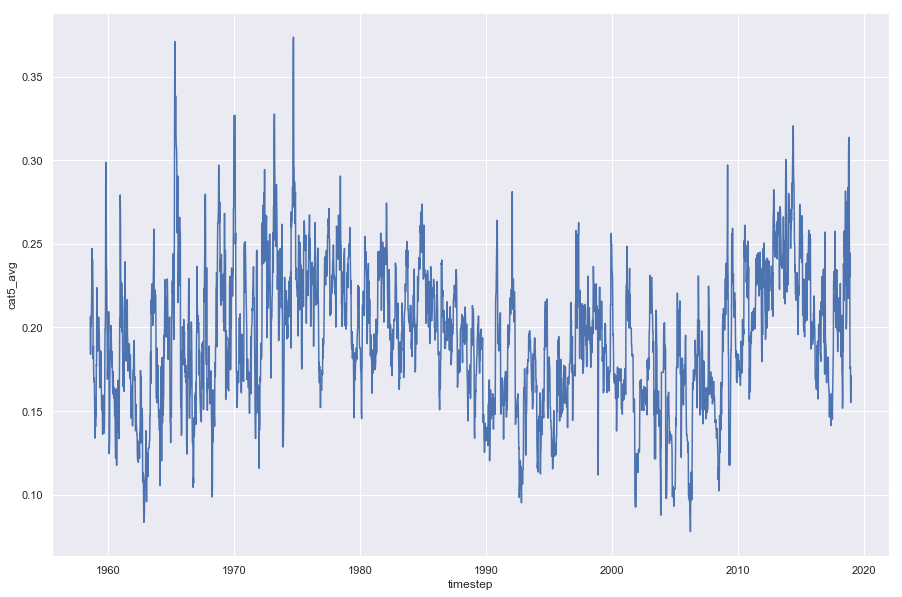

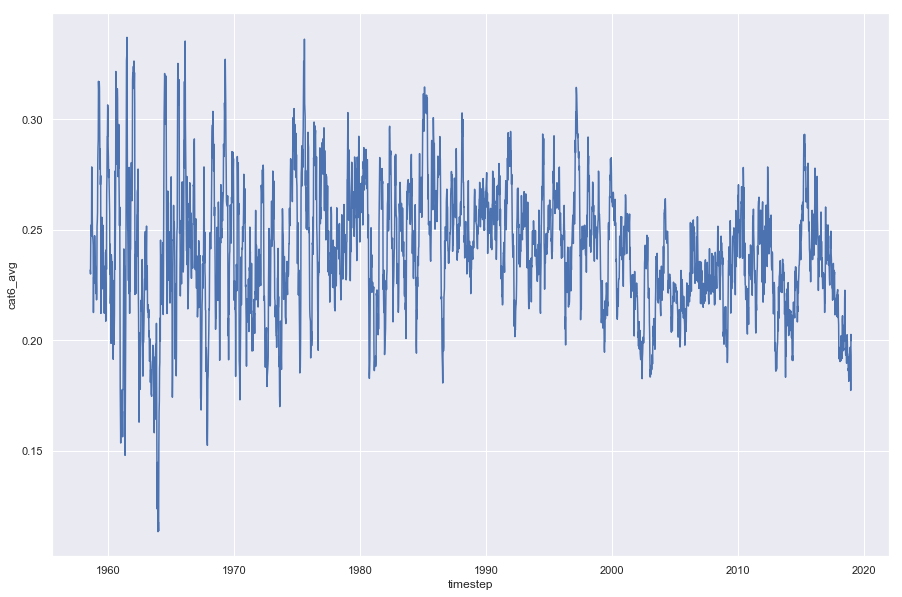

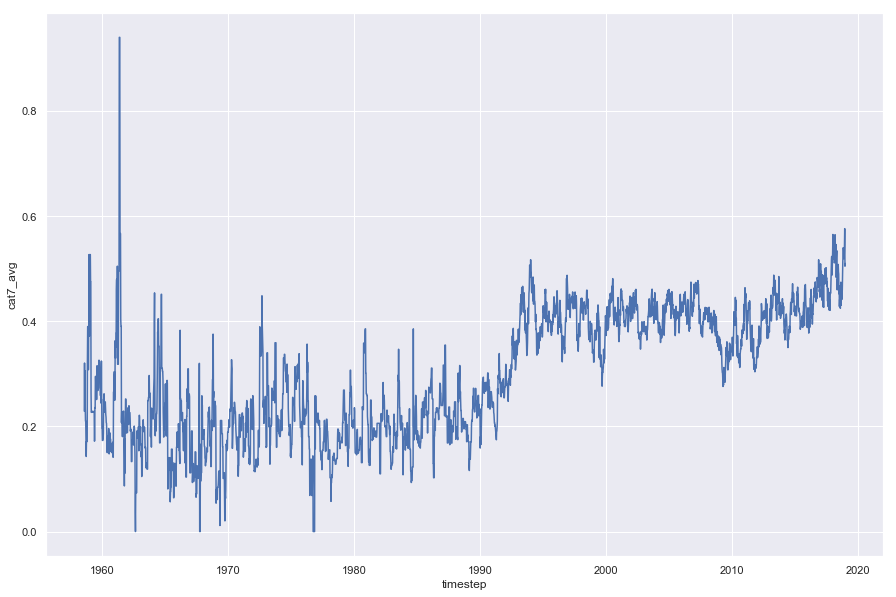

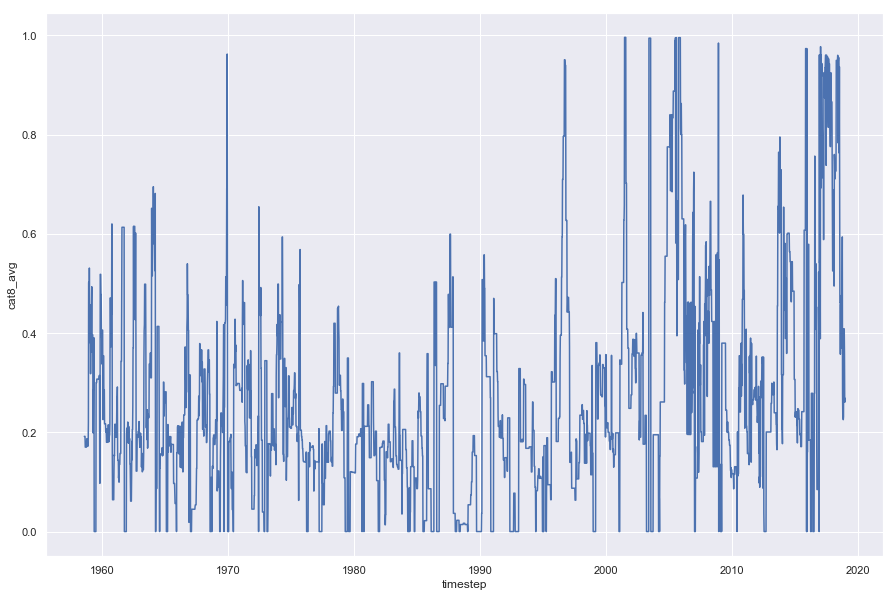

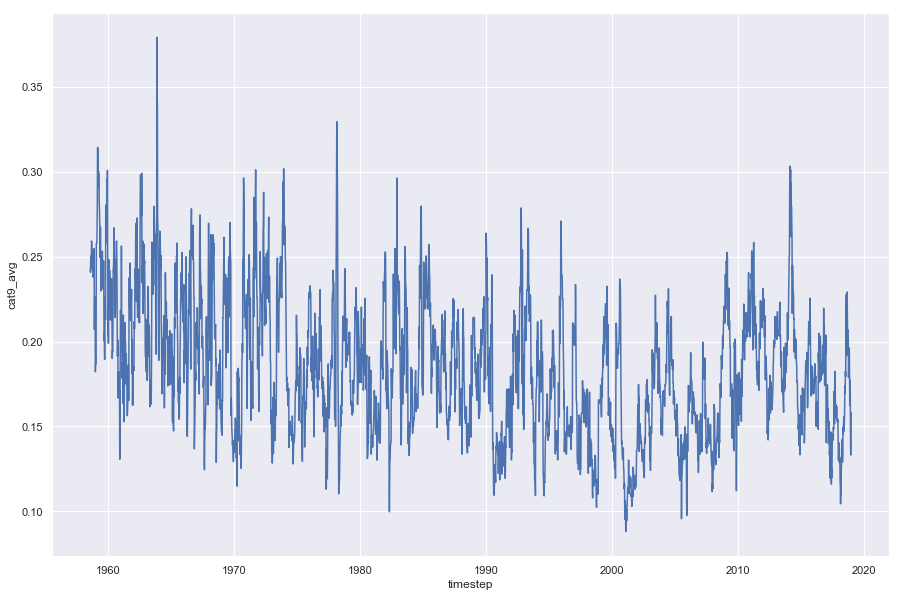

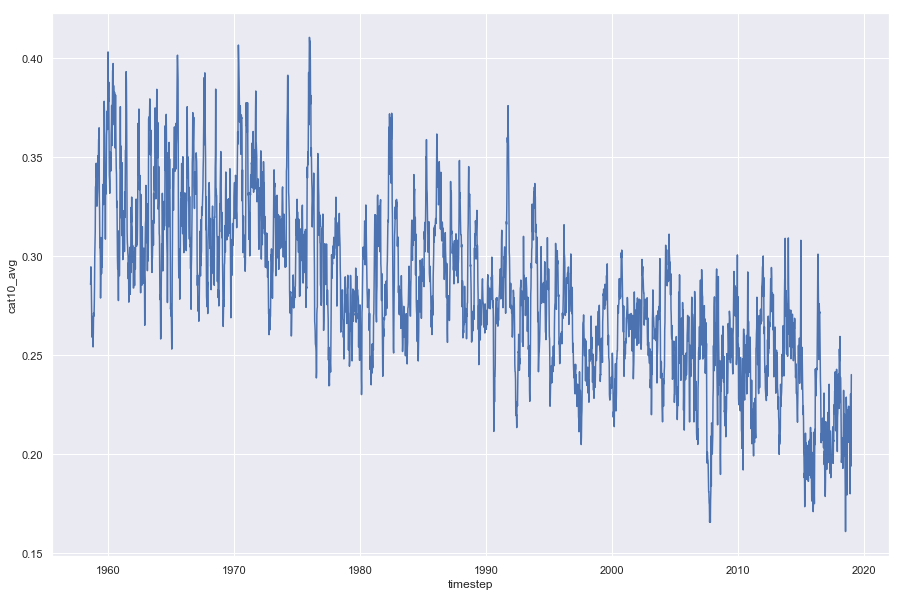

<Figure size 1080x720 with 0 Axes>

In [82]:
for i in range(11):
    sns.lineplot(x=week_data_df["timestep"],y=week_data_df["cat{}_avg".format(i)])
    plt.show()
    plt.clf()

In [152]:
num_2_cat = {1: 'Country',
             3: 'Psyche/Regret',
             4: 'People',
             5: 'Craze/Party',
             7: 'Hip-Hop',
             8: 'Foreign Songs',
             9: 'Noise/Sounds',
             10: 'World/Earth',
             0: 'Dance/Rhythm',
             2: 'Affection',
             6: 'Desire'}
#{"cat{}_avg".format(topic_num):num_2_cat[topic_num] for topic_num in num_2_cat}

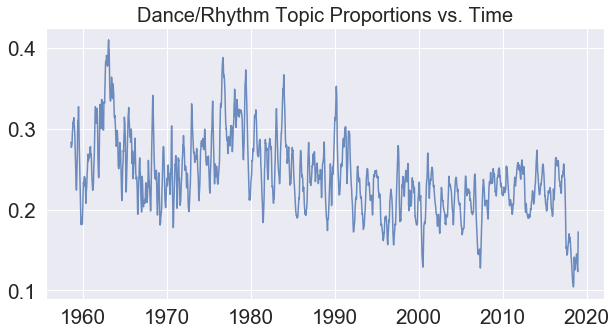

<Figure size 1080x504 with 0 Axes>

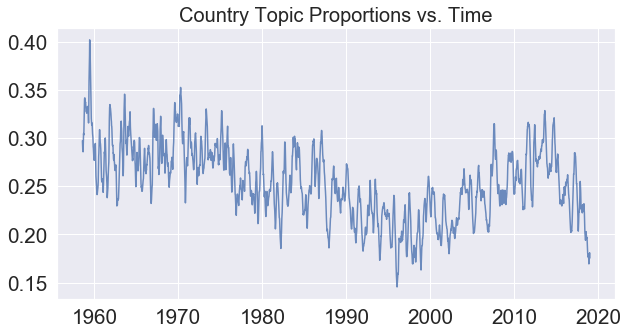

<Figure size 1080x504 with 0 Axes>

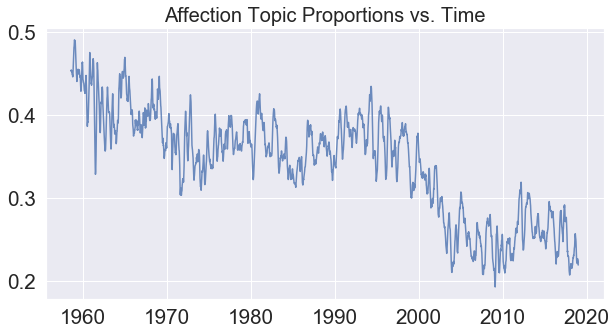

<Figure size 1080x504 with 0 Axes>

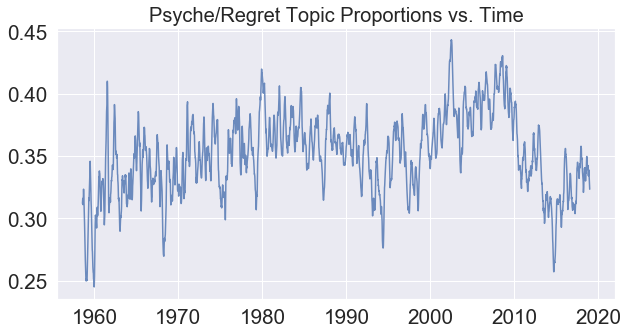

<Figure size 1080x504 with 0 Axes>

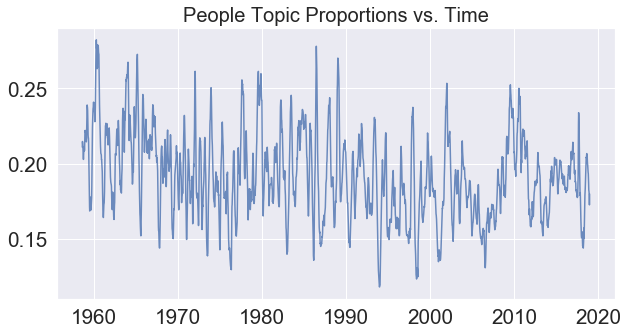

<Figure size 1080x504 with 0 Axes>

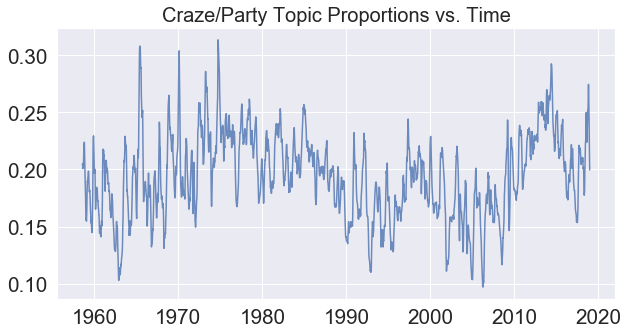

<Figure size 1080x504 with 0 Axes>

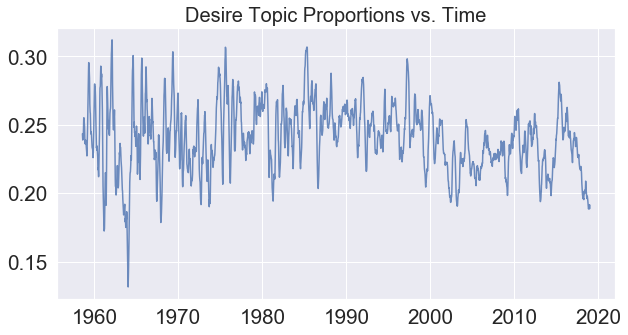

<Figure size 1080x504 with 0 Axes>

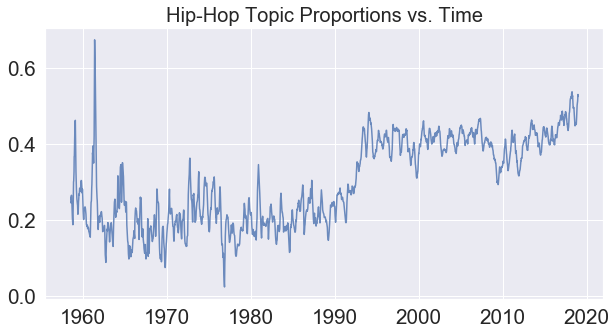

<Figure size 1080x504 with 0 Axes>

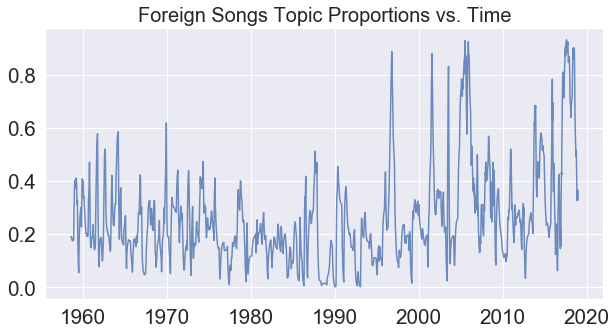

<Figure size 1080x504 with 0 Axes>

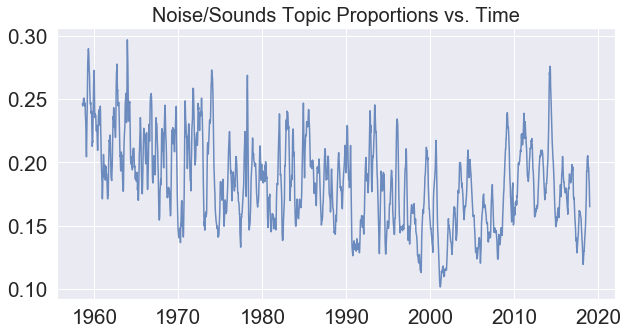

<Figure size 1080x504 with 0 Axes>

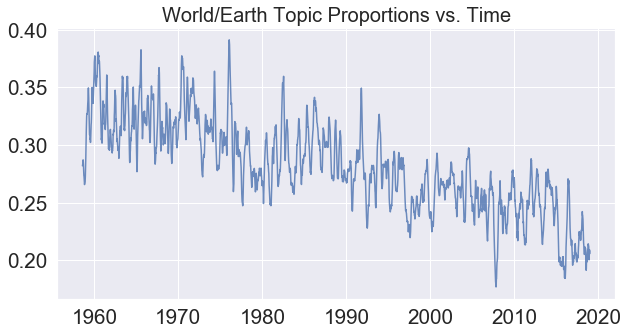

<Figure size 1080x504 with 0 Axes>

In [154]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

for i in range(11):
    x = week_data_df["timestep"]
    y = week_data_df["cat{}_avg".format(i)]
    model = SimpleExpSmoothing(np.asarray(y))
    #model._index = x

    fit1 = model.fit()
    #pred1 = fit1.forecast(9)
    fit2 = model.fit(smoothing_level=.4)
    #pred2 = fit2.forecast(9)
    fit3 = model.fit(smoothing_level=.2)
    #pred3 = fit3.forecast(9)

    plt.figure(figsize=(10, 5))
    #plt.plot(x, fit1.fittedvalues, label = "Original", alpha=0.8)
    #plt.plot(x, fit2.fittedvalues, label = "fit2", alpha=0.8)
    plt.plot(x, fit3.fittedvalues, label = "fit3", alpha=0.8)
    #plt.legend(fontsize=20)
    plt.title("{} Topic Proportions vs. Time".format(num_2_cat[i]),fontsize=20)
    plt.show()
    plt.clf()

In [89]:
tmp = week_data_df.reset_index().drop("index",axis=1)

In [90]:
tmp.head()

,timestep,cat0_cnts,cat1_cnts,cat2_cnts,cat3_cnts,cat4_cnts,cat5_cnts,cat6_cnts,cat7_cnts,cat8_cnts,...,cat1_avg,cat2_avg,cat3_avg,cat4_avg,cat5_avg,cat6_avg,cat7_avg,cat8_avg,cat9_avg,cat10_avg
0,1958-08-02,17,25,49,23,15,11,19,3,3,...,0.269514,0.455901,0.326027,0.229547,0.206242,0.231762,0.228968,0.191738,0.242538,0.285916
1,1958-08-09,18,25,53,28,14,13,18,4,3,...,0.272524,0.451417,0.321185,0.209374,0.183920,0.229945,0.320396,0.191738,0.240827,0.286398
2,1958-08-16,14,22,46,24,15,11,15,4,3,...,0.283769,0.455144,0.291122,0.205967,0.206762,0.246427,0.233494,0.191738,0.250288,0.294703
3,1958-08-23,17,22,46,23,14,12,14,5,3,...,0.280207,0.445662,0.314947,0.202642,0.200878,0.247508,0.305731,0.191738,0.250288,0.292283
4,1958-08-30,16,18,41,23,13,11,13,5,2,...,0.313165,0.456953,0.315376,0.192908,0.201776,0.252156,0.234258,0.170060,0.242846,0.283094


In [91]:
pickle.dump(tmp,open("../data/lda_clusters_week_2_cluster_info.pickle","wb"))

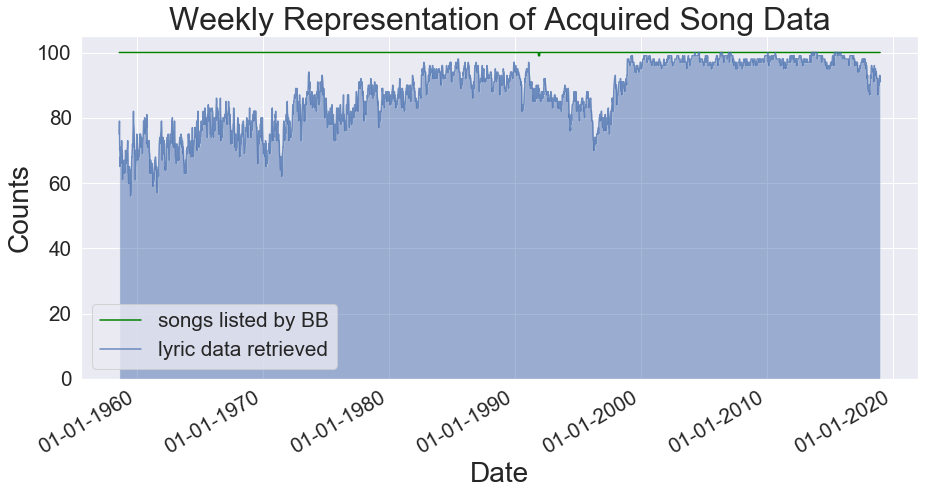

In [146]:
import matplotlib.dates as mdates
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
fig, ax = plt.subplots()
lolo = BB.groupby("timestep").size().reset_index(name="cnts")
ax = sns.lineplot(x=lolo["timestep"],y=lolo["cnts"],color="green",label="songs listed by BB")
lolo2 = Big_DF.groupby("timestep").size().reset_index(name="cnts")
ax=sns.lineplot(x=lolo2["timestep"],y=lolo2["cnts"],label="lyric data retrieved",alpha=0.8)
ax.fill_between(lolo2["timestep"],0,lolo2["cnts"],label="lyric data retrieved",alpha=0.5)
ax.set_xlabel("Date",fontsize=28)
ax.set_ylabel("Counts",fontsize=28)
ax.set_title("Weekly Representation of Acquired Song Data",fontsize=32)
ax.set_ylim(0,105)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

In [141]:
Big_DF.shape[0]/BB.shape[0]

0.8750598645712745